In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from sklearn.metrics import auc,roc_curve
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data= pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.drop('customerID',axis=1,inplace=True)

In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print('------------------------------------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------------

In [6]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['TotalCharges'].loc[488]

' '

In [8]:
data=data[data['TotalCharges']!=' ']

In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data['TotalCharges']=data['TotalCharges'].astype('float')

In [11]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')

In [13]:
convert=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [14]:
for i in convert:
    data[i]= data[i].replace('No internet service','No')

In [15]:
for i in data.columns:
    print(data[i].value_counts())
    print('------------------------------------------------')

Male      3549
Female    3483
Name: gender, dtype: int64
------------------------------------------------
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------------------------
No     3639
Yes    3393
Name: Partner, dtype: int64
------------------------------------------------
No     4933
Yes    2099
Name: Dependents, dtype: int64
------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
------------------------------------------------
Yes    6352
No      680
Name: PhoneService, dtype: int64
------------------------------------------------
No     4065
Yes    2967
Name: MultipleLines, dtype: int64
------------------------------------------------
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
------------------------------------------------
No     5017
Yes    2015
Name: 

In [16]:
yes_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [17]:
for i in yes_columns:
    data[i]= data[i].replace({'Yes':1,'No':0})

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [19]:
data['gender']=data['gender'].replace({'Female':1,'Male':0})

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
data=pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [23]:
X= data.drop('Churn',axis=1)
y= data['Churn']

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [25]:
scaler= MinMaxScaler()

In [26]:
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

<ipython-input-26-893ef469719a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-26-893ef469719a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [27]:
models= {'Logistic_regression': LogisticRegression(),
        'Decision_tree': DecisionTreeClassifier(),
        'K-Neighbors': KNeighborsClassifier(n_neighbors=3),
        'Random_forest': RandomForestClassifier(n_estimators=80,max_depth=11),
        'Adaboost': AdaBoostClassifier(),
        'XgBoost': XGBClassifier(),
        'Random_XGB': XGBRFClassifier()}

train_score={}
test_score={}

for name,model in models.items():
    model.fit(X_train,y_train)
    train_score[name]= model.score(X_train,y_train)
    test_score[name]= model.score(X_test,y_test)

C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
train_score

{'Logistic_regression': 0.8037333333333333,
 'Decision_tree': 0.9976888888888888,
 'K-Neighbors': 0.8613333333333333,
 'Random_forest': 0.9032888888888889,
 'Adaboost': 0.8064,
 'XgBoost': 0.9434666666666667,
 'Random_XGB': 0.8152888888888888}

In [29]:
test_score

{'Logistic_regression': 0.8123667377398721,
 'Decision_tree': 0.7448471926083866,
 'K-Neighbors': 0.7476901208244492,
 'Random_forest': 0.8009950248756219,
 'Adaboost': 0.8088130774697939,
 'XgBoost': 0.7874911158493249,
 'Random_XGB': 0.7995735607675906}

In [30]:
result= pd.DataFrame(train_score, index=['Train_score'])
result= result.T
result['Test_score']= test_score.values()
result['Difference']= np.subtract(result['Train_score'],result['Test_score'])
result

,Train_score,Test_score,Difference
Logistic_regression,0.803733,0.812367,-0.008633
Decision_tree,0.997689,0.744847,0.252842
K-Neighbors,0.861333,0.747690,0.113643
Random_forest,0.903289,0.800995,0.102294
Adaboost,0.806400,0.808813,-0.002413
XgBoost,0.943467,0.787491,0.155976
Random_XGB,0.815289,0.799574,0.015715


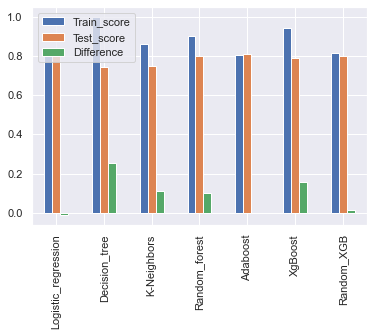

In [31]:
result.plot.bar();

In [32]:
lr= LogisticRegression().fit(X_train,y_train)

In [33]:
lr.score(X_test,y_test)

0.8123667377398721

In [34]:
y_pred= lr.predict(X_test)
y_prob= lr.predict_proba(X_test)

Roc Curve: 0.851794524022757


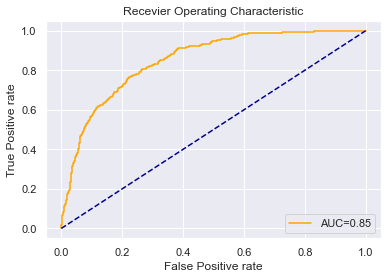

In [35]:
positive_prob=y_prob[:,1]
fpr,tpr,threshold= roc_curve(y_test,positive_prob)
roc_auc= auc(fpr,tpr)
print('Roc Curve:',roc_auc)
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');

In [36]:
cm= confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred)
print('Confusion Matrix:')
print(cm)
print('\n')
print('Classification Report:')
print(cr)

Confusion Matrix:
[[938  95]
 [169 205]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



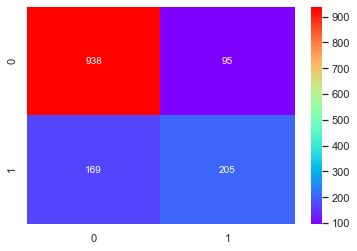

In [37]:
sns.heatmap(cm,annot=True,fmt='d',cmap='rainbow');

In [38]:
prediction= pd.DataFrame()
prediction['Y_true']= y_test
prediction['Y_pred']=y_pred

In [39]:
prediction

,Y_true,Y_pred
5134,1,1
2428,1,0
2503,0,0
3119,1,1
2534,0,0
...,...,...
2356,0,0
3643,0,0
6713,0,0
6627,0,0
